In [1]:
# 主成分分析を Python で理解する
# https://qiita.com/maskot1977/items/082557fcda78c4cdb41f
import numpy as np
import pandas as pd
from pandas import plotting
import urllib.request 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器

In [2]:
url = "https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/wine.txt"
urllib.request.urlretrieve(url, 'wine.txt') 

('wine.txt', <http.client.HTTPMessage at 0x7fc9cf617ba8>)

In [3]:
df = pd.read_csv("wine.txt", sep="\t", index_col=0)
print('Data size:', df.shape)

Data size: (178, 14)


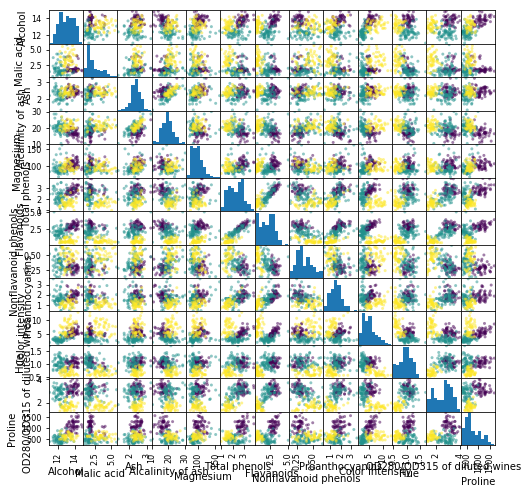

In [4]:
plotting.scatter_matrix(df.iloc[:, 1:], figsize=(8,8), c=list(df.iloc[:, 0]))
plt.show()

## scikit-lean PCA

In [5]:
# normalization
dfs = df.iloc[:, 1:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
dfs = dfs[['Color intensity', 'Flavanoids', 'Alcohol', 'Proline']]
dfs.head()

,Color intensity,Flavanoids,Alcohol,Proline
0,0.251009,1.031908,1.514341,1.010159
1,-0.292496,0.731565,0.245597,0.962526
2,0.268263,1.212114,0.196325,1.391224
3,1.182732,1.462399,1.686791,2.328007
4,-0.318377,0.661485,0.294868,-0.037767


In [6]:
pca = PCA()
pca.fit(dfs)
feature = pca.transform(dfs)
pd.DataFrame(feature, columns=[f'PC{x+1}' for x in range(len(dfs.columns))]).head() # (N, n_pc)

,PC1,PC2,PC3,PC4
0,1.961585,-0.545627,-0.197206,0.507026
1,0.844371,-0.875875,-0.203594,-0.293168
2,1.457648,-0.966836,0.294984,-0.607212
3,3.377947,-0.513604,0.111948,-0.339856
4,0.240919,-0.624128,0.070921,0.417963


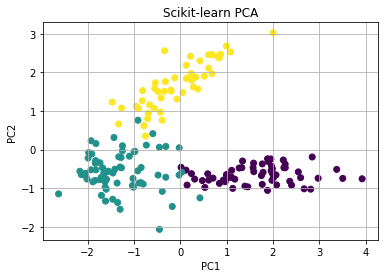

In [7]:
plt.scatter(feature[:, 0], feature[:, 1], c=list(df.iloc[:, 0]))
plt.grid()
plt.title('Scikit-learn PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [8]:
# 寄与率（固有値(pca.explained_variance)を合計１で正規化したもの）
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,0.533531
PC2,0.309520
PC3,0.084787
PC4,0.072162


Text(0,0.5,'Cumualtive contribution rate')

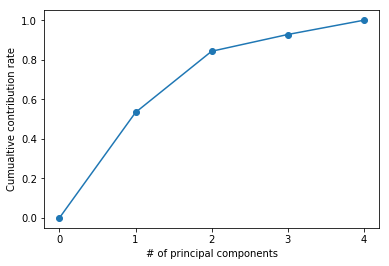

In [9]:
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0]+list(np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel('# of principal components')
plt.ylabel('Cumualtive contribution rate')

In [10]:
pd.DataFrame(pca.components_, columns=dfs.columns, index=[f'PC{x+1}' for x in range(len(dfs.columns))])

,Color intensity,Flavanoids,Alcohol,Proline
PC1,0.409416,0.325547,0.605601,0.599704
PC2,0.633932,-0.725357,0.168286,-0.208967
PC3,0.636547,0.566896,-0.388715,-0.349768
PC4,-0.159113,0.215651,0.673667,-0.688731


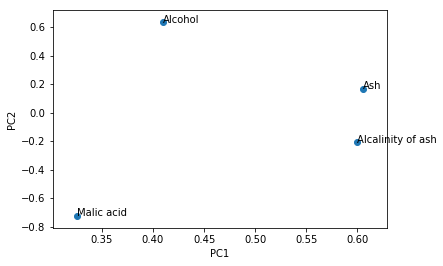

In [11]:
# 各成分の寄与度をプロット
for x, y, name in zip(pca.components_[0], pca.components_[1], df.columns[1:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## 演習

In [12]:
dfs = dfs[['Color intensity', 'Flavanoids', 'Alcohol', 'Proline']]
pca = PCA()
pca.fit(dfs)
feature = pca.transform(dfs) # (N, h)
pd.DataFrame(feature, columns=[f'PC{x+1}' for x in range(len(dfs.columns))]).head() # (N, n_pc

,PC1,PC2,PC3,PC4
0,1.961585,-0.545627,-0.197206,0.507026
1,0.844371,-0.875875,-0.203594,-0.293168
2,1.457648,-0.966836,0.294984,-0.607212
3,3.377947,-0.513604,0.111948,-0.339856
4,0.240919,-0.624128,0.070921,0.417963


Text(0,0.5,'PC2')

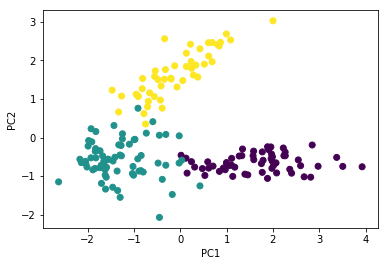

In [13]:
plt.scatter(feature[:, 0], feature[:, 1], c=list(df.iloc[:, 0]))
plt.xlabel('PC1')
plt.ylabel('PC2')

In [14]:
# 固有ベクトル
pd.DataFrame(pca.components_, columns=dfs.columns, index=[f'PC{x+1}' for x in range(len(dfs.columns))])

,Color intensity,Flavanoids,Alcohol,Proline
PC1,0.409416,0.325547,0.605601,0.599704
PC2,0.633932,-0.725357,0.168286,-0.208967
PC3,0.636547,0.566896,-0.388715,-0.349768
PC4,-0.159113,0.215651,0.673667,-0.688731


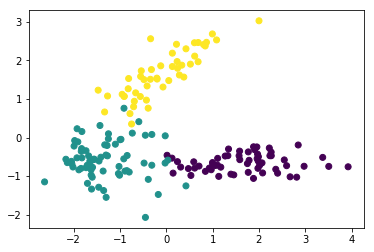

In [15]:
data = np.dot(dfs.values, pca.components_[:2, :].T) # (N, h) (h, 2)
plt.scatter(data[:, 0], data[:, 1], c=list(df.iloc[:, 0]))

## 自力でPCA

In [16]:
dfc = dfs.corr()
dfc
# np.dot(dfs.values.T, dfs.values)/dfs.shape[0]

,Color intensity,Flavanoids,Alcohol,Proline
Color intensity,1.000000,-0.172379,0.546364,0.316100
Flavanoids,-0.172379,1.000000,0.236815,0.494193
Alcohol,0.546364,0.236815,1.000000,0.643720
Proline,0.316100,0.494193,0.643720,1.000000


In [17]:
eig_val, eig_vec = np.linalg.eig(dfc)
print(eig_val.shape, eig_val)
print(eig_vec.shape, eig_vec)

(4,) [2.13412212 1.23808176 0.33914837 0.28864774]
(4, 4) [[-0.40941602  0.63393186 -0.63654682  0.15911338]
 [-0.32554699 -0.72535703 -0.56689587 -0.21565114]
 [-0.60560142  0.16828625  0.38871536 -0.67366685]
 [-0.59970376 -0.20896726  0.34976791  0.68873107]]


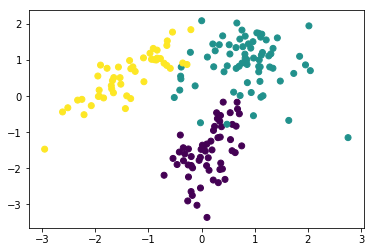

In [18]:
data = np.dot(dfs.values, eig_vec[:2, :].T) # PC1, PC2
plt.scatter(data[:, 0], data[:, 1], c=list(df.iloc[:, 0]))

In [19]:
# 寄与率は固有値の累積和で割って正規化した割合
print(eig_val)
print([v/eig_val.sum() for v in eig_val])

[2.13412212 1.23808176 0.33914837 0.28864774]
[0.5335305310889075, 0.30952044080086116, 0.08478709297960654, 0.07216193513062485]
